<a href="https://colab.research.google.com/github/jubayerhossain625/StromLive/blob/main/Lamia_Final_Task_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue Dec 19 18:24:33 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
import numpy as np
import cv2
from google.colab import files
from IPython.display import Image, display
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
classes = ['ALL','Brain Cancer','Breast Cancer','Cervical Cancer','Kidney Cancer','Lung and Colon Cancer','Lymphoma','Oral Cancer']

In [ ]:
num_classes = len(classes)
num_classes

8

In [ ]:
train_path= '/content/drive/MyDrive/Final Base Dataset/process/train'
valid_path= '/content/drive/MyDrive/Final Base Dataset/process/valid'
test_path= '/content/drive/MyDrive/Final Base Datase/process/testData'

In [ ]:
# import shutil
# import os
# import random

# original_path = '/content/drive/MyDrive/Final Base Dataset/train/ALL'
# copy_path = '/content/drive/MyDrive/Final Base Dataset/process/test/ALL'
# num_images_to_copy = 28

# # Ensure the copy path exists, create if not
# os.makedirs(copy_path, exist_ok=True)

# # List all files in the original path
# files = os.listdir(original_path)

# # Randomly select 200 files (images)
# selected_files = random.sample(files, num_images_to_copy)

# # Copy each selected file from the original path to the copy path
# for file in selected_files:
#     original_file_path = os.path.join(original_path, file)
#     copy_file_path = os.path.join(copy_path, file)
#     shutil.copy(original_file_path, copy_file_path)

# print(f"{num_images_to_copy} images copied successfully!")

In [ ]:
initalModel = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

initalModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

batch_size = 32

train_generator = datagen.flow_from_directory(
   train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
test_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1664 images belonging to 8 classes.
Found 128 images belonging to 8 classes.
Found 128 images belonging to 8 classes.


In [ ]:
# test_generator = datagen.flow_from_directory(
#     test_path,
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation'
# )

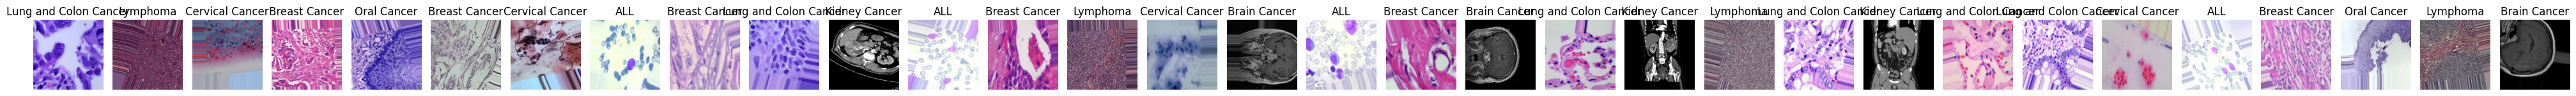

In [ ]:
import matplotlib.pyplot as plt

# Assuming imgs is a batch of images and labels is a batch of corresponding labels
imgs, labels = next(train_generator)

def plotImages(images_arr, labels):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(40, 40))
    axes = axes.flatten()

    for img, label, ax in zip(images_arr, labels, axes):
        ax.imshow(img)
        ax.set_title(classes[np.argmax(label)])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plotImages(imgs, labels)


In [ ]:
epochs = 10

historyInitalModel = initalModel.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/10
52/52 [==============================] - 835s 16s/step - loss: 1.3061 - accuracy: 0.4976 - val_loss: 0.7341 - val_accuracy: 0.7031
Epoch 2/10
52/52 [==============================] - 37s 721ms/step - loss: 0.6647 - accuracy: 0.7386 - val_loss: 0.8450 - val_accuracy: 0.7109
Epoch 3/10
52/52 [==============================] - 40s 774ms/step - loss: 0.4822 - accuracy: 0.8173 - val_loss: 0.4393 - val_accuracy: 0.8594
Epoch 4/10
52/52 [==============================] - 38s 724ms/step - loss: 0.3616 - accuracy: 0.8648 - val_loss: 0.2824 - val_accuracy: 0.9141
Epoch 5/10
52/52 [==============================] - 39s 759ms/step - loss: 0.2755 - accuracy: 0.9008 - val_loss: 0.3212 - val_accuracy: 0.8750
Epoch 6/10
52/52 [==============================] - 38s 738ms/step - loss: 0.2150 - accuracy: 0.9159 - val_loss: 0.2835 - val_accuracy: 0.8906
Epoch 8/10
52/52 [==============================] - 37s 721ms/step - loss: 0.1946 - accuracy: 0.9435 - val_loss: 0.2358 - val_accuracy: 0.9375


In [ ]:
# Save the trained model
initalModel.save("initalModel.h5")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming you have test data and labels
test_data, test_labels = validation_generator.next()

# Make predictions
predictions = initalModel.predict(test_data)

# Convert one-hot encoded labels to integers
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracyInitalModel = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix_inital = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
classification_rep = classification_report(true_labels, predicted_labels, target_names=classes)

# Evaluate the model on the test data
loss, accuracy = initalModel.evaluate(validation_generator)



4/4 [==============================] - 2s 531ms/step - loss: 0.1593 - accuracy: 0.9688


In [ ]:
# Print results
print(f'Accuracy: { accuracyInitalModel * 100 } %')
print(f'Loss: {loss}')
print('\nConfusion Matrix:')
print(conf_matrix_inital)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 96.88%
Loss: 0.1593

Confusion Matrix:
[[3 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 4 1 0 0 0 1]
 [0 0 0 6 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 5]]

Classification Report:
                       precision    recall  f1-score   support

                  ALL       1.00      1.00      1.00         3
         Brain Cancer       1.00      1.00      1.00         2
        Breast Cancer       1.00      0.67      0.80         6
      Cervical Cancer       0.86      1.00      0.92         6
        Kidney Cancer       1.00      1.00      1.00         5
Lung and Colon Cancer       1.00      1.00      1.00         2
             Lymphoma       1.00      1.00      1.00         3
          Oral Cancer       0.83      1.00      0.91         5

             accuracy                           0.94        32
            macro avg       0.96      0.96      0.95        32
         weighted avg       0.95      0.94      0.93        32



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

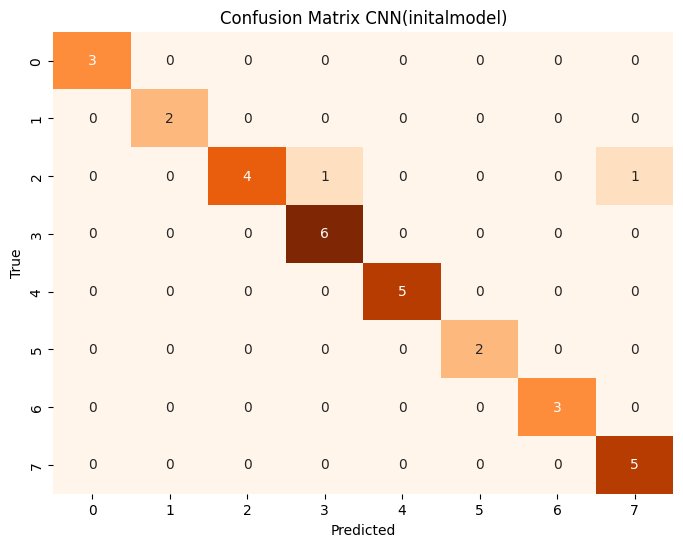

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title('Confusion Matrix CNN(initalmodel)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


 # DenseNet169 model applyed

In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the DenseNet169 model
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the weights of the pre-trained model

model_denseNet169 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_denseNet169.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

batch_size = 32

# Load and preprocess data
train_generator = datagen.flow_from_directory(
     train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)





Found 1664 images belonging to 8 classes.
Found 128 images belonging to 8 classes.


In [ ]:
# Load and preprocess data
test_generator = datagen.flow_from_directory(

      valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 544 images belonging to 8 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
epochs = 1
history = model_denseNet169.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

52/52 [==============================] - 32s 612ms/step - loss: 0.0362 - accuracy: 0.9874 - val_loss: 0.2672 - val_accuracy: 0.8984


In [ ]:
# Save the trained model
model_denseNet169.save("model_denseNet169.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming you have test data and labels
test_data, test_labels = validation_generator.next()

# Make predictions
predictions = model_denseNet169.predict(test_data)

# Convert one-hot encoded labels to integers
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy_d69 = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix_d169 = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
classification_rep_d169 = classification_report(true_labels, predicted_labels, target_names=classes)

# Evaluate the model on the test data
loss, accuracy = model_denseNet169.evaluate(validation_generator)

4/4 [==============================] - 3s 735ms/step - loss: 0.3841 - accuracy: 0.8672


In [ ]:
# Print the metrics
print(f'Accuracy: {accuracy_d69*100} %')
print(f'Loss: {loss:.2}')
print('\nConfusion Matrix:')
print(conf_matrix_d169)
print('\nclassification Reports:')
print(classification_rep_d169)

Accuracy: 84.375 %
Loss: 0.38

Confusion Matrix:
[[3 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0]
 [0 0 1 3 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 3 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 6]]

classification Reports:
                       precision    recall  f1-score   support

                  ALL       1.00      1.00      1.00         3
         Brain Cancer       1.00      1.00      1.00         4
        Breast Cancer       0.50      1.00      0.67         5
      Cervical Cancer       1.00      0.75      0.86         4
        Kidney Cancer       1.00      1.00      1.00         4
Lung and Colon Cancer       1.00      0.25      0.40         4
             Lymphoma       1.00      1.00      1.00         1
          Oral Cancer       1.00      0.86      0.92         7

             accuracy                           0.84        32
            macro avg       0.94      0.86      0.86        32
         weighted avg       0.92      0.84      0.84        32



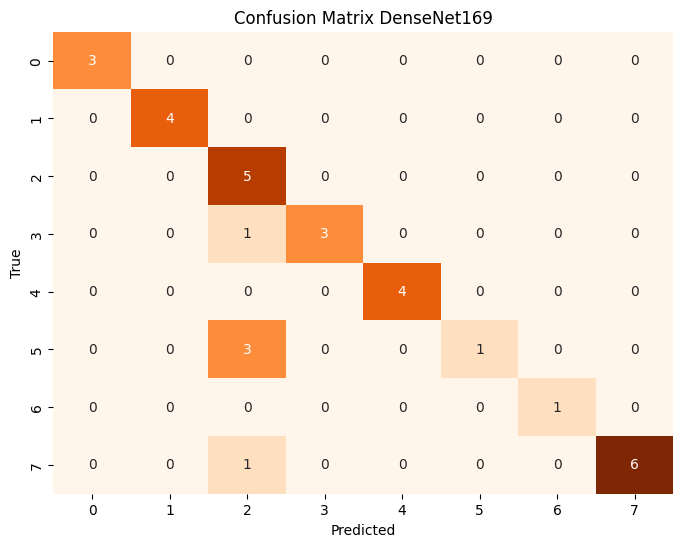

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_d169, annot=True, fmt="d", cmap="Oranges", cbar=False,
            )
plt.title('Confusion Matrix DenseNet169')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Applyed MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
# Define MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Create the model
MobileNetV2_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
MobileNetV2_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
epochs = 2
# Fit the model with early stopping
historyMobileNetV2 = MobileNetV2_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/2
52/52 [==============================] - 35s 554ms/step - loss: 0.4078 - accuracy: 0.8660 - val_loss: 0.2824 - val_accuracy: 0.8828
Epoch 2/2
52/52 [==============================] - 29s 558ms/step - loss: 0.1117 - accuracy: 0.9585 - val_loss: 0.2155 - val_accuracy: 0.9297


In [ ]:
# Save the trained model
MobileNetV2_model.save("MobileNetV2_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming you have test data and labels
test_data, test_labels = validation_generator.next()

# Make predictions
predictions = MobileNetV2_model.predict(test_data)

# Convert one-hot encoded labels to integers
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy_mv2 = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix_mvv2 = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
classification_rep_mv2 = classification_report(true_labels, predicted_labels, target_names=classes)

# Evaluate the model on the test data
loss, accuracy = MobileNetV2_model.evaluate(validation_generator)

4/4 [==============================] - 2s 449ms/step - loss: 0.2919 - accuracy: 0.8906


In [ ]:
# Print the metrics
print(f'Accuracy: {accuracy_mv2*100} %')
print(f'Loss: {loss}')
print('Confusion Matrix:')
print(conf_matrix_mvv2)
print('\nClassification Report')
print(classification_rep_mv2)


Accuracy: 93.75 %
Loss: 0.29186731576919556
Confusion Matrix:
[[5 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 1]
 [0 0 0 2 0 0 0 0]
 [0 0 0 0 7 0 0 0]
 [0 0 0 0 0 3 0 1]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 5]]

Classification Report
                       precision    recall  f1-score   support

                  ALL       1.00      1.00      1.00         5
         Brain Cancer       1.00      1.00      1.00         3
        Breast Cancer       1.00      0.67      0.80         3
      Cervical Cancer       1.00      1.00      1.00         2
        Kidney Cancer       1.00      1.00      1.00         7
Lung and Colon Cancer       1.00      0.75      0.86         4
             Lymphoma       1.00      1.00      1.00         3
          Oral Cancer       0.71      1.00      0.83         5

             accuracy                           0.94        32
            macro avg       0.96      0.93      0.94        32
         weighted avg       0.96      0.94      0.94        32



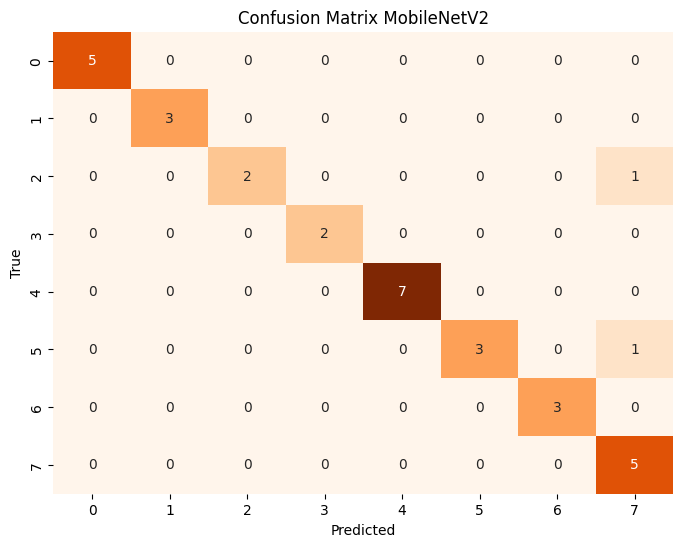

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mvv2, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title('Confusion Matrix MobileNetV2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Implement the AlexNet architecture of 5 layers

In [ ]:
 #implement the AlexNet architecture of 5 layers

In [ ]:
from tensorflow.keras import layers, models

AlexNet_model = models.Sequential([
    # Layer 1
    layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.BatchNormalization(),

    # Layer 2
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.BatchNormalization(),

    # Layer 3
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

    # Layer 4
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

    # Layer 5
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.BatchNormalization(),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])



In [ ]:

AlexNet_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# you can change epochs value try to 50,70,100.
epochs = 26
# Fit the model with early stopping
AlexnetHistory = AlexNet_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/26
52/52 [==============================] - 30s 573ms/step - loss: 0.5039 - accuracy: 0.8564 - val_loss: 4.4579 - val_accuracy: 0.3281
Epoch 2/26
52/52 [==============================] - 29s 559ms/step - loss: 0.3205 - accuracy: 0.9123 - val_loss: 1.3828 - val_accuracy: 0.7344
Epoch 3/26
52/52 [==============================] - 29s 559ms/step - loss: 0.3670 - accuracy: 0.9044 - val_loss: 0.5902 - val_accuracy: 0.7812
Epoch 4/26
52/52 [==============================] - 29s 560ms/step - loss: 0.3821 - accuracy: 0.9069 - val_loss: 3.6277 - val_accuracy: 0.6016
Epoch 5/26
52/52 [==============================] - 29s 556ms/step - loss: 0.3497 - accuracy: 0.9093 - val_loss: 0.3123 - val_accuracy: 0.8984
Epoch 6/26
52/52 [==============================] - 31s 590ms/step - loss: 0.3287 - accuracy: 0.9165 - val_loss: 1.3659 - val_accuracy: 0.7031
Epoch 7/26
52/52 [==============================] - 29s 564ms/step - loss: 0.2880 - accuracy: 0.9165 - val_loss: 0.3895 - val_accuracy: 0.8984

In [ ]:
# Save the trained model
AlexNet_model.save("AlexNet_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming you have test data and labels
test_data, test_labels = validation_generator.next()

# Make predictions
predictions = AlexNet_model.predict(test_data)

# Convert one-hot encoded labels to integers
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
alex_net_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix_alexnet = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
conf_rep_AlexNet = classification_report(true_labels, predicted_labels, target_names=classes)

# Evaluate the model on the test data
loss, accuracy = AlexNet_model.evaluate(validation_generator)

4/4 [==============================] - 2s 413ms/step - loss: 0.5397 - accuracy: 0.8516


In [ ]:
print("AlexNext Architecturre Reports:")
print(f'Accuracy: {alex_net_accuracy*100} %')
print('Confusion Matrix:')
print(conf_matrix_alexnet)
print("\nClassification Reports:")
print(conf_rep_AlexNet)

AlexNext Architecturre Reports:
Accuracy: 84.375 %
Confusion Matrix:
[[5 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 1]
 [0 0 3 3 0 0 1 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 5]]

Classification Reports:
                       precision    recall  f1-score   support

                  ALL       1.00      1.00      1.00         5
         Brain Cancer       1.00      1.00      1.00         6
        Breast Cancer       0.40      0.67      0.50         3
      Cervical Cancer       1.00      0.43      0.60         7
        Kidney Cancer       1.00      1.00      1.00         2
Lung and Colon Cancer       1.00      1.00      1.00         2
             Lymphoma       0.67      1.00      0.80         2
          Oral Cancer       0.83      1.00      0.91         5

             accuracy                           0.84        32
            macro avg       0.86      0.89      0.85        32
         weighted avg       0.90      0.84      0.84      

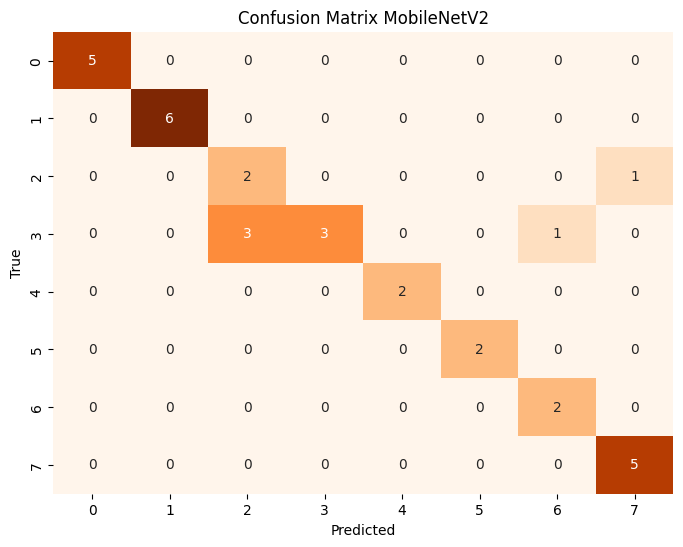

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_alexnet, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title('Confusion Matrix MobileNetV2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Applyed model VGGGNet

In [ ]:
# improve model VGGGNet

In [ ]:
from tensorflow.keras import layers, models

modelVGGGNet = models.Sequential([
    # Block 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 4
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Block 5
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

modelVGGGNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# you can change epochs value try to 50,70,100.
epochs = 7
# Fit the VGG-like model with early stopping
history_vgg = modelVGGGNet.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,

)

52/52 [==============================] - 61s 703ms/step - loss: 2.1427 - accuracy: 0.1232 - val_loss: 2.0801 - val_accuracy: 0.1250


In [ ]:
# Save the trained model
modelVGGGNet.save("modelVGGGNet.h5")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming you have test data and labels
test_data, test_labels = validation_generator.next()

# Make predictions
predictions = modelVGGGNet.predict(test_data)

# Convert one-hot encoded labels to integers
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy_vgg = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix_vgg = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
conf_rep_vgg = classification_report(true_labels, predicted_labels, target_names=classes)

# Evaluate the model on the test data
loss, accuracy = modelVGGGNet.evaluate(validation_generator)

1/1 [==============================] - 0s 232ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 3s 693ms/step - loss: 2.0801 - accuracy: 0.1250


In [ ]:
# Print the metrics for VGG-like model
print('\nMetrics for VGG-like Model:')
print(f'Accuracy: {accuracy_vgg*100} %')
print('\nConfusion Matrix:')
print(conf_matrix_vgg)
print('\nClassification Report:')
print(conf_rep_vgg)


Metrics for VGG-like Model:
Accuracy: 12.5 %

Confusion Matrix:
[[0 4 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]]

Classification Report:
                       precision    recall  f1-score   support

                  ALL       0.00      0.00      0.00         4
         Brain Cancer       0.12      1.00      0.22         4
        Breast Cancer       0.00      0.00      0.00         3
      Cervical Cancer       0.00      0.00      0.00         4
        Kidney Cancer       0.00      0.00      0.00         6
Lung and Colon Cancer       0.00      0.00      0.00         4
             Lymphoma       0.00      0.00      0.00         3
          Oral Cancer       0.00      0.00      0.00         4

             accuracy                           0.12        32
            macro avg       0.02      0.12      0.03        32
         weighted avg       0.02      0.12      0.03        32


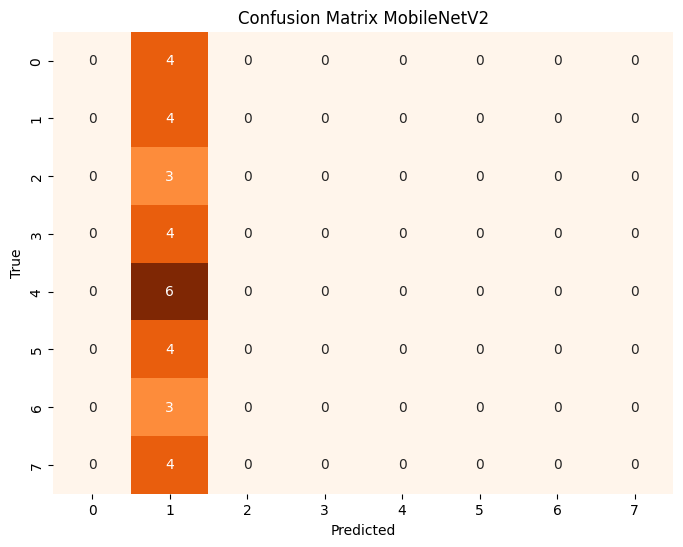

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_vgg, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title('Confusion Matrix MobileNetV2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Applyed RestNet

In [ ]:
# improvements RestNet-50
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

modelRestNet50 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Freeze the layers of the pre-trained ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

modelRestNet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# you can change epochs value try to 50,70,100.
epochs = 40
# Train the model with early stopping
historymodelRestNet50 = modelRestNet50.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

Epoch 1/40
52/52 [==============================] - 36s 579ms/step - loss: 1.9901 - accuracy: 0.2524 - val_loss: 1.8314 - val_accuracy: 0.3516
Epoch 2/40
52/52 [==============================] - 30s 569ms/step - loss: 1.7650 - accuracy: 0.3486 - val_loss: 1.6268 - val_accuracy: 0.3984
Epoch 3/40
52/52 [==============================] - 30s 574ms/step - loss: 1.6239 - accuracy: 0.4207 - val_loss: 1.5920 - val_accuracy: 0.4531
Epoch 4/40
52/52 [==============================] - 30s 576ms/step - loss: 1.5139 - accuracy: 0.4651 - val_loss: 1.4736 - val_accuracy: 0.5312
Epoch 5/40
52/52 [==============================] - 30s 576ms/step - loss: 1.4678 - accuracy: 0.4579 - val_loss: 1.3999 - val_accuracy: 0.4844
Epoch 6/40
52/52 [==============================] - 29s 564ms/step - loss: 1.3584 - accuracy: 0.5288 - val_loss: 1.3376 - val_accuracy: 0.4844
Epoch 7/40
52/52 [==============================] - 30s 578ms/step - loss: 1.2941 - accuracy: 0.5511 - val_loss: 1.3466 - val_accuracy: 0.6016

In [ ]:
# Save the trained model
modelRestNet50.save("modelRestNet50.h5")

In [ ]:

# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 672 images belonging to 8 classes.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming you have test data and labels
test_data, test_labels = validation_generator.next()

# Make predictions
predictions = modelRestNet50.predict(test_data)

# Convert one-hot encoded labels to integers
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
restnet_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix_resnet50 = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
conf_rep_restnet = classification_report(true_labels, predicted_labels, target_names=classes)

# Evaluate the model on the test data
loss, accuracy = modelRestNet50.evaluate(validation_generator)

1/1 [==============================] - 1s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 3s 617ms/step - loss: 0.8549 - accuracy: 0.5781


In [ ]:
# Print the metrics for RestNet50 model
print('\nMetrics for VGG-like Model:')
print(f'Accuracy: {restnet_accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix_resnet50)
print('\nClassification Report:')
print(conf_rep_restnet)


Metrics for VGG-like Model:
Accuracy: 0.65625

Confusion Matrix:
[[2 0 0 0 0 3 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 1 2]]

Classification Report:
                       precision    recall  f1-score   support

                  ALL       1.00      0.40      0.57         5
         Brain Cancer       1.00      1.00      1.00         8
        Breast Cancer       0.00      0.00      0.00         2
      Cervical Cancer       0.00      0.00      0.00         3
        Kidney Cancer       1.00      1.00      1.00         4
Lung and Colon Cancer       0.00      0.00      0.00         2
             Lymphoma       0.83      1.00      0.91         5
          Oral Cancer       0.50      0.67      0.57         3

             accuracy                           0.66        32
            macro avg       0.54      0.51      0.51        32
         weighted avg       0.71      0.66      0.66        32

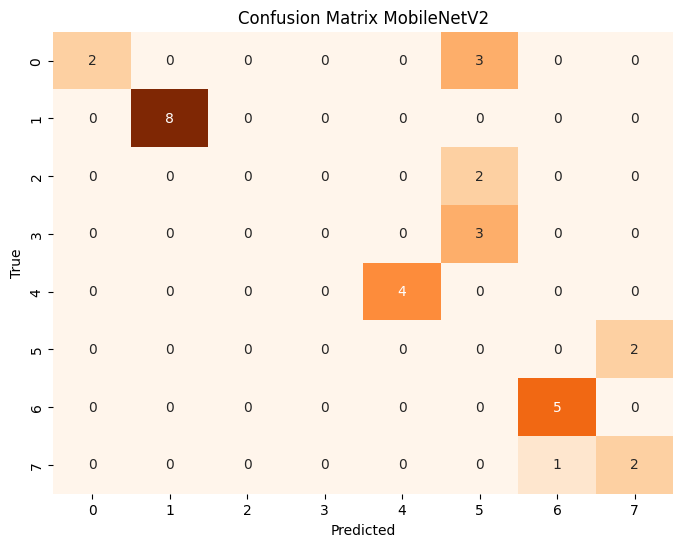

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_resnet50, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title('Confusion Matrix MobileNetV2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Final view accuracy in DenseNet, MobileNet,AlexNet,VGGGNet,restnet

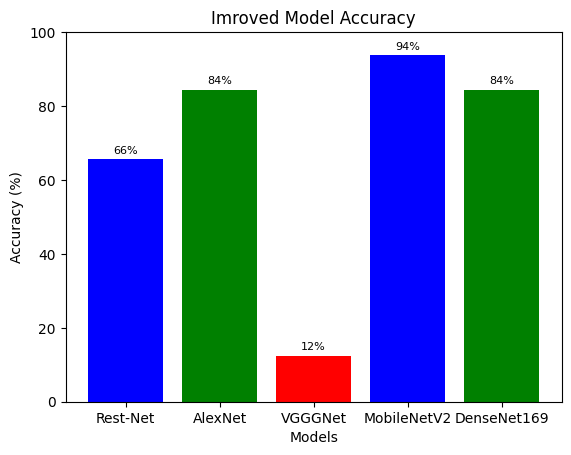

In [ ]:
import matplotlib.pyplot as plt

#restnet_accuracy
# accuracy_vgg
# alex_net_accuracy
# accuracy_mv2
# accuracy_d69
# accuracyInitalModel

models = ['Rest-Net', 'AlexNet','VGGGNet',"MobileNetV2","DenseNet169"]
accuracy_scores = [restnet_accuracy,alex_net_accuracy,accuracy_vgg,accuracy_mv2,accuracy_d69]

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Set colors for bars
colors = ['blue', 'green','red']

plt.bar(models, accuracy_percentages, color=colors)
plt.title('Imroved Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Adjust the y-axis limits for better visualization

# Add data labels
for i, value in enumerate(accuracy_percentages):
    plt.text(i, value + 1, f'{value:.0f}%', ha='center', va='bottom', fontsize=8)

plt.show()

In [ ]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

In [ ]:


# # Load an image for prediction
# img_path = '/content/drive/MyDrive/Data_TB/valid/Normal/Screenshot_242.jpg'
# # img_path = '/content/drive/MyDrive/Data_TB/test/Normal/Screenshot_242.jpg'

# img = image.load_img(img_path, target_size=(224, 224))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

In [ ]:
# # Make a prediction
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions[0])
# # Map the predicted class index to the class name
# predicted_class_name = classes[predicted_class]
# print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 55ms/step
Predicted class: Abnormal


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def main():
    # Set your input shape and number of classes
    input_shape = (224, 224, 3)
    num_classes = 8  # Change this to your number of classes

    # Create VGG-like model
    modelVGGGNet = create_model(input_shape, num_classes)

    # Compile the model
    modelVGGGNet.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Example data augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Replace with your actual directory
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    # Set your desired number of epochs
    epochs = 7

    # Define learning rate schedule
    def lr_schedule(epoch):
        initial_learning_rate = 0.001
        decay = 0.9
        if epoch % 2 == 0:
            return initial_learning_rate * decay
        else:
            return initial_learning_rate

    lr_scheduler = LearningRateScheduler(lr_schedule)

    # Train the model
    history_vgg = modelVGGGNet.fit(
        train_generator,
        epochs=epochs,
        callbacks=[lr_scheduler]
    )

if __name__ == "__main__":
    main()


Found 2080 images belonging to 8 classes.
Epoch 1/7
25/65 [==========>...................] - ETA: 8:53 - loss: 2.2792 - accuracy: 0.1175